### <h1> Task 1 <h1> (Поиск минимума/максимума в векторе)

In [7]:
from IPython.display import display
import pandas as pd
from myplots import time_iter_plot, time_thread_plot, speedup_plot

In [8]:
data_lock = pd.read_csv('data/minmax_lock.csv')
data_critical = pd.read_csv('data/minmax_critical.csv')
data_reduction = pd.read_csv('data/minmax_reduction.csv')
display(data_lock)
display(data_critical)
display(data_reduction)

,Num_Threads,Iter,Time
0,1,90,70
1,2,90,45
2,3,90,128
3,4,90,46
4,5,90,155
...,...,...,...
91,12,9000000,5761092
92,13,9000000,8254788
93,14,9000000,9816078
94,15,9000000,10893620


,Num_Threads,Iter,Time
0,1,90,19198
1,2,90,532
2,3,90,320
3,4,90,265
4,5,90,340
...,...,...,...
91,12,9000000,4350281
92,13,9000000,6996049
93,14,9000000,8603675
94,15,9000000,10239003


,Num_Threads,Iter,Time
0,1,90,45
1,2,90,52
2,3,90,40
3,4,90,39
4,5,90,68
...,...,...,...
91,12,9000000,26760
92,13,9000000,28467
93,14,9000000,30624
94,15,9000000,28877


In [9]:
labels = ['Lock', 'Critical', 'Reduction']

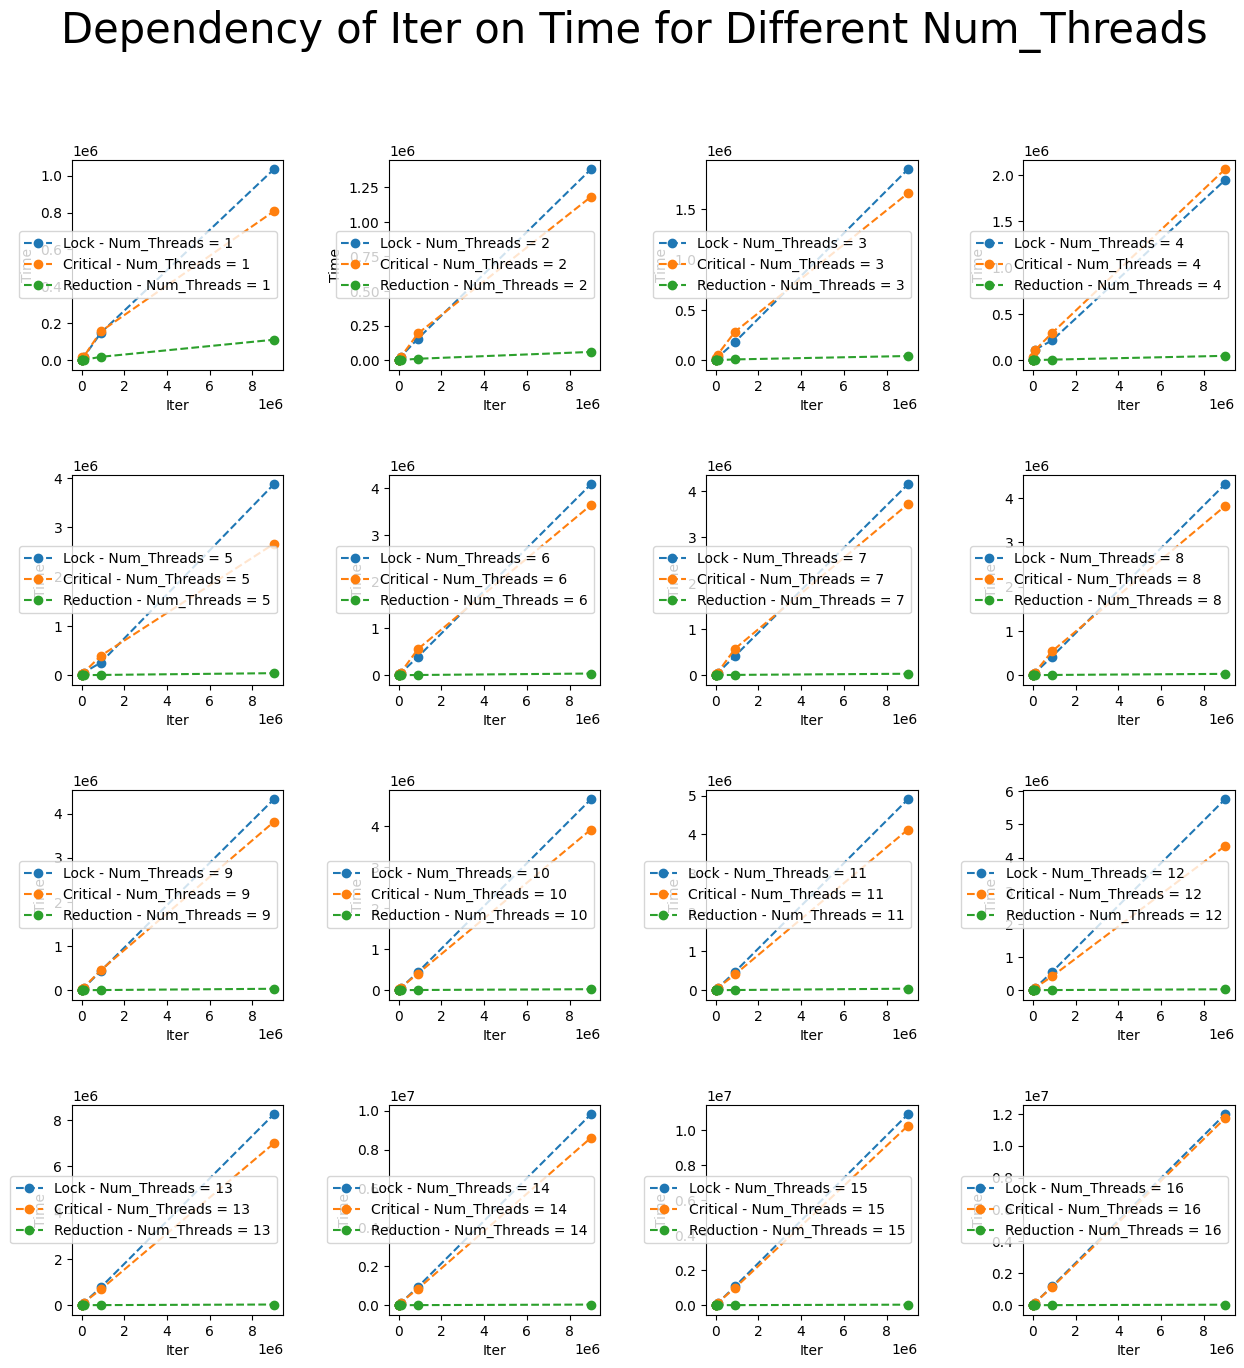

In [10]:
thread_groups_lock = data_lock.groupby('Num_Threads')
thread_groups_critical = data_critical.groupby('Num_Threads')
thread_groups_reduction = data_reduction.groupby('Num_Threads')

thread_groups = [thread_groups_lock, thread_groups_critical, thread_groups_reduction]
time_iter_plot(thread_groups, labels)

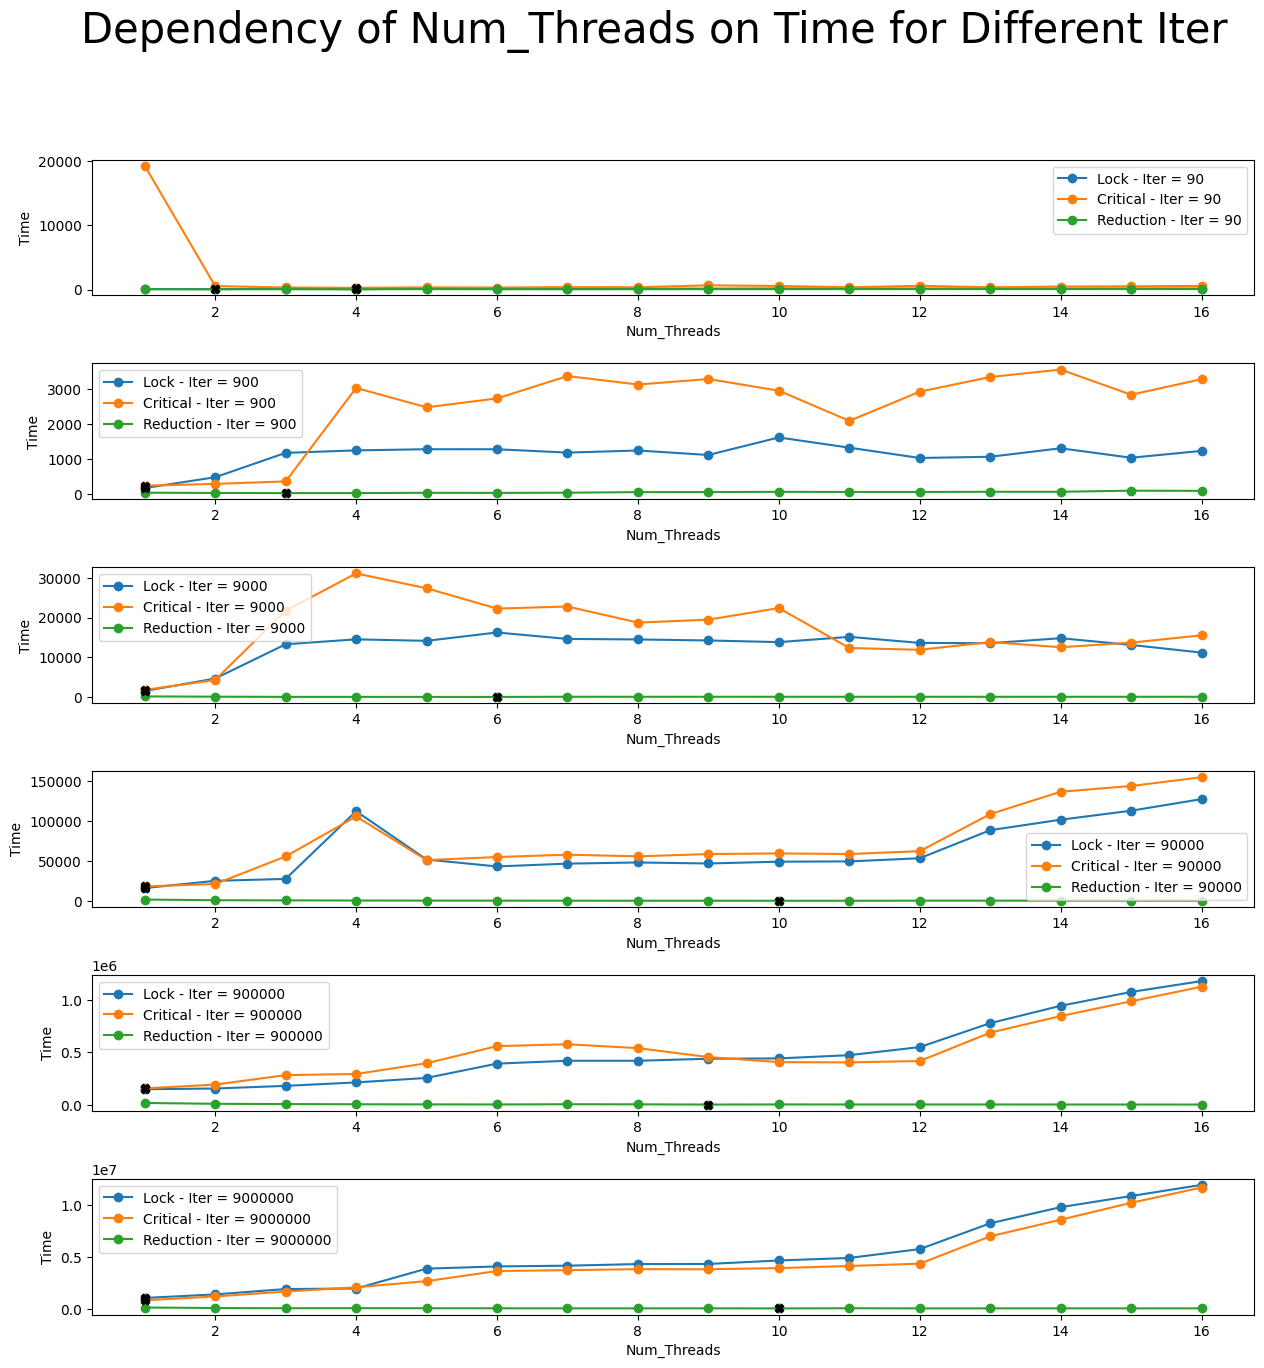

In [11]:
iter_groups_lock = data_lock.groupby('Iter', as_index=False)
iter_groups_critical = data_critical.groupby('Iter', as_index=False)
iter_groups_reduction = data_reduction.groupby('Iter', as_index=False)

iter_groups = [iter_groups_lock, iter_groups_critical, iter_groups_reduction]
time_thread_plot(iter_groups, labels)

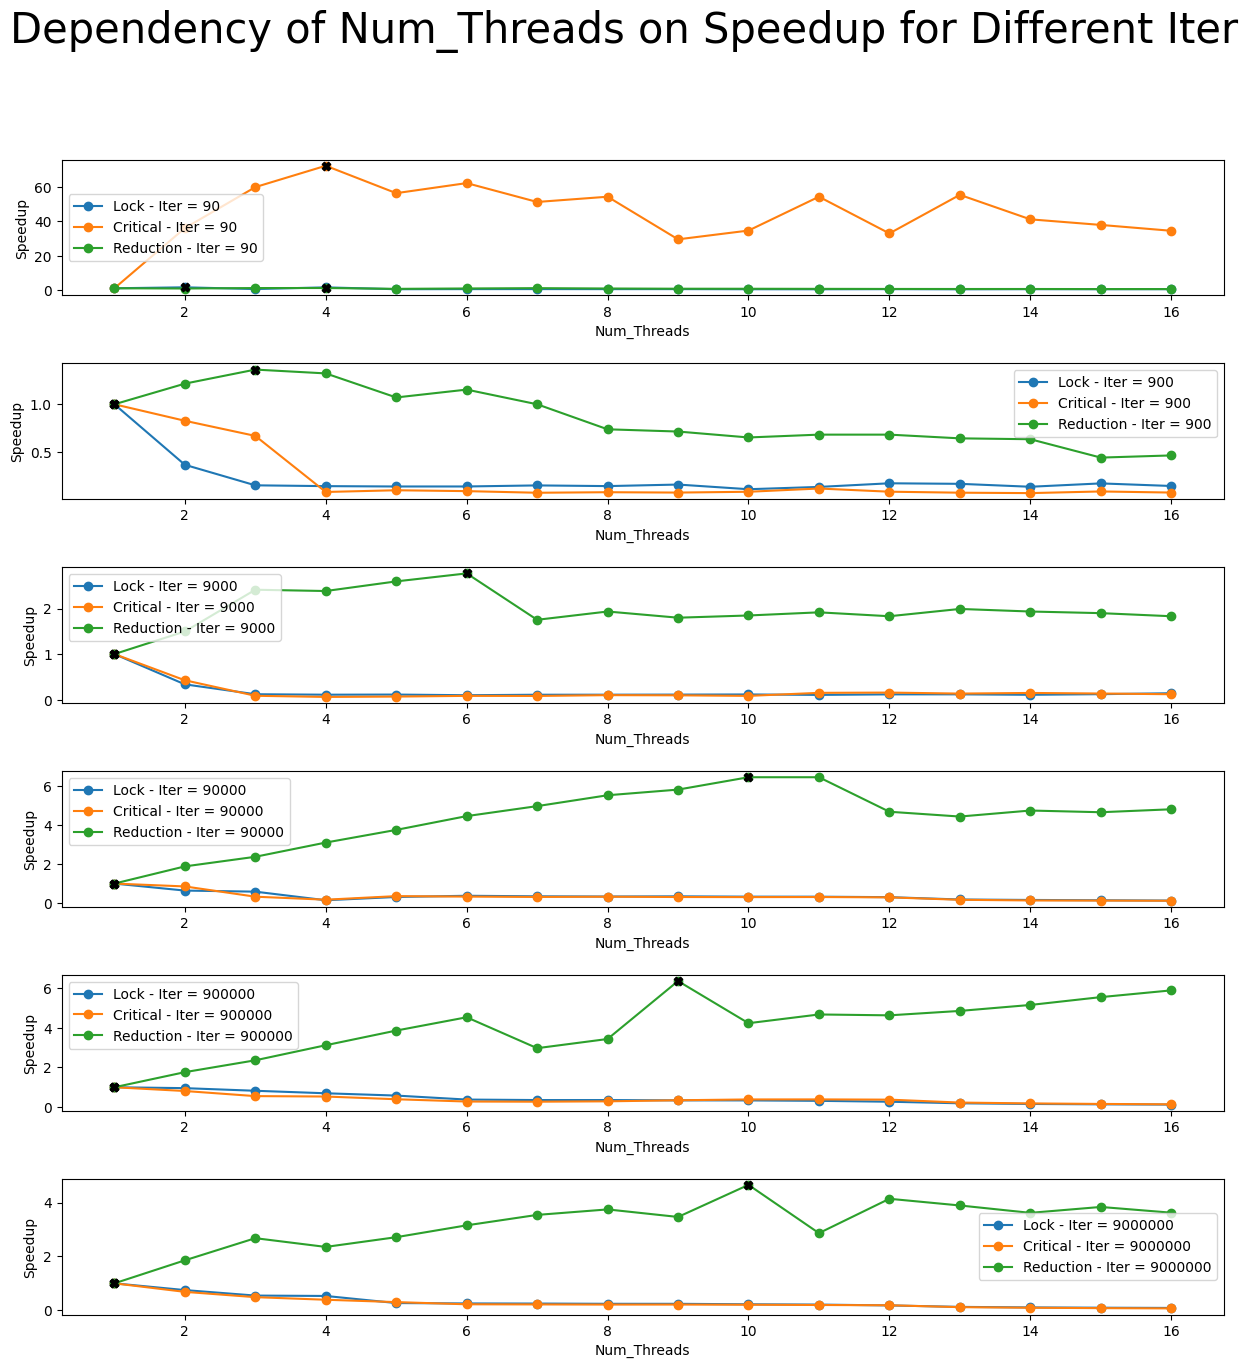

In [12]:
speedup_plot(iter_groups, labels)

# Вывод:
Из представленных графиков можно составить следующий рейтинг производительности для разных способов организации взаимоисключения: 
1. _Reduction_
2. _Critical_
3. _Lock_
***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 